# Inferential Questions

* What are the most sought-after skills for data-analyst positions?
* Which cities are hiring the most data-analysts?
* Which companies are hiring the most data-analysts?
* How do salary outcomes differ between remote-work & non-remote work?

In [1]:
import pandas as pd

# import data
encode_df = pd.read_csv("data/encoded_data.csv")
encode_df.head()

,Unnamed: 0,id,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,2,21 to 23,an hour,22.0,21.0,23.0,22.0,NaN,45760.0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [2]:
encode_df.shape

(11206, 137)

In [3]:
clean_df = pd.read_csv("data/cleaned_data.csv")
clean_df.head()

,Unnamed: 0,id,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,2,2,21 to 23,an hour,22.0,21.0,23.0,22.0,NaN,45760.0,...,0,0,0,0,0,0,0,0,0,0
1,11,11,100K to 140K,a year,120000.0,100000.0,140000.0,NaN,120000.0,120000.0,...,0,0,0,0,0,0,0,0,0,0
2,20,20,25 to 26,an hour,25.5,25.0,26.0,25.5,NaN,53040.0,...,0,0,0,0,0,0,0,0,0,1
3,58,58,25,an hour,25.0,NaN,NaN,25.0,NaN,52000.0,...,0,0,0,0,0,0,0,0,0,0
4,63,63,73570 to 110350,a year,91960.0,73570.0,110350.0,NaN,91960.0,91960.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
clean_df.shape

(2229, 137)

# Distributions

Let's view the distributions of `salary_standardized` 

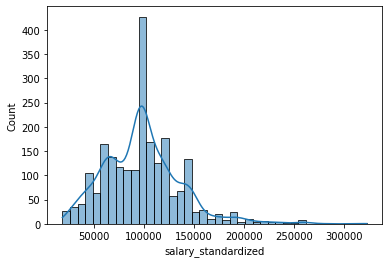

In [353]:
import seaborn as sns

sns.histplot(clean_df["salary_standardized"], kde=True)

plt.savefig("images/stand_salary_hist.jpg")

In [354]:
import scipy.stats as stats

# mean = clean_df["salary_standardized"].mean(), std = clean_df["salary_standardized"].std()
stats.kstest(clean_df["salary_standardized"], stats.norm.cdf, args=(clean_df["salary_standardized"].mean(), clean_df["salary_standardized"].std()))

KstestResult(statistic=0.0884061189073454, pvalue=1.3144684207219956e-15)

<AxesSubplot:>

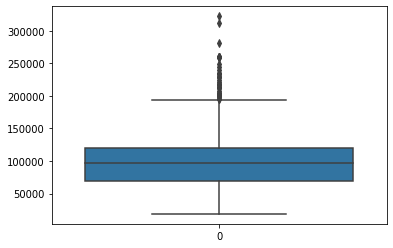

In [355]:
sns.boxplot(clean_df["salary_standardized"])

We have plenty of outliers, so lets remove those

In [335]:
clean_df = clean_df[(np.abs(stats.zscore(clean_df["salary_standardized"])) < 3)]
clean_df.to_csv("data/no_outliers.csv", index=False)
clean_df.shape

(2203, 137)

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

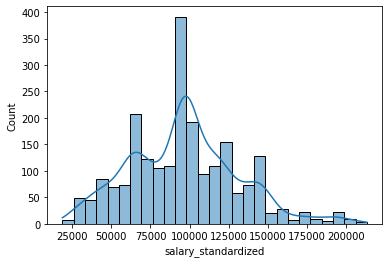

In [221]:
sns.histplot(clean_df["salary_standardized"], kde=True)

In [222]:
stats.kstest(clean_df["salary_standardized"], stats.norm.cdf, args=(clean_df["salary_standardized"].mean(), clean_df["salary_standardized"].std()))

KstestResult(statistic=0.07484203688470209, pvalue=3.538934046801227e-11)

<AxesSubplot:>

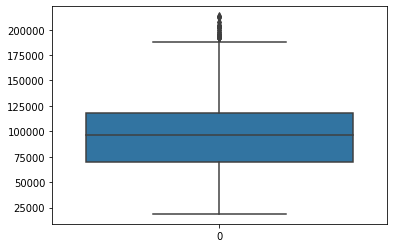

In [223]:
sns.boxplot(clean_df["salary_standardized"])

Let's view the distributions of remote & non-remote `salary_standardized` 

In [11]:
# leaving large commented blocks of code: ANTI-PATTERN
"""
# groupby is when you want to quickly compute aggregates on multiple groups
# dataframe_object.method()
# leave paranthesis blank when you do not pass in ANY arguments
encode_df.dropna(subset=["salary_standardized"])
clean_df.isna()
clean_df.sum()

df["column"]
# go over .loc & .iloc
# df.loc[]
# df.iloc[]

grouped_remote = clean_df.groupby(by=["work_from_home", "sql"])["salary_standardized"].mean()
#grouped_remote
"""

# boolean indexing
clean_df_remote = clean_df[clean_df["work_from_home"] == True]
clean_df_nomote = clean_df[clean_df["work_from_home"] == False]

print("Remote")
print(clean_df_remote.shape)
print("Non_Remote")
print(clean_df_nomote.shape)

C:\Users\saidmf\AppData\Local\Temp\ipykernel_28256\3041883722.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_df.mean()


Unnamed: 0       5386.588156
id               5386.293405
salary_avg      47578.631821
salary_min      39991.637229
salary_max      57607.182675
                    ...     
visio               0.008973
visual_basic        0.002243
vue                 0.000000
vue.js              0.000000
word                0.045760
Length: 126, dtype: float64

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

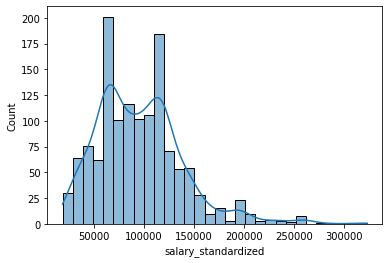

In [361]:
sns.histplot(clean_df[clean_df["work_from_home"] == True]["salary_standardized"], kde=True)

<AxesSubplot:xlabel='work_from_home', ylabel='salary_standardized'>

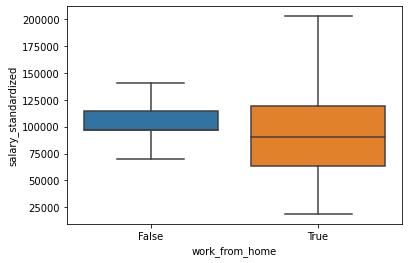

In [364]:
sns.boxplot(data=clean_df, y="salary_standardized", x="work_from_home", showfliers=False)

In [362]:
stats.kstest(clean_df_remote["salary_standardized"], stats.norm.cdf, args=(clean_df_remote["salary_standardized"].mean(), clean_df_remote["salary_standardized"].std()))

KstestResult(statistic=0.07387056224442179, pvalue=9.112003142853433e-07)

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

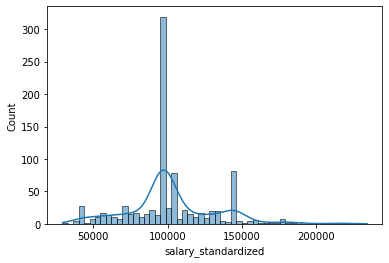

In [382]:
sns.histplot(clean_df_nomote["salary_standardized"], kde=True)

In [365]:
stats.kstest(clean_df_nomote["salary_standardized"], stats.norm.cdf, args=(clean_df_nomote["salary_standardized"].mean(), clean_df_nomote["salary_standardized"].std()))

KstestResult(statistic=0.18113066066731165, pvalue=3.184538697598516e-26)

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

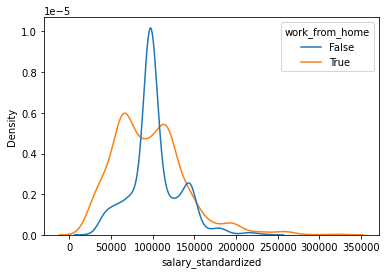

In [380]:
sns.kdeplot(data=clean_df, x="salary_standardized", hue="work_from_home")

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

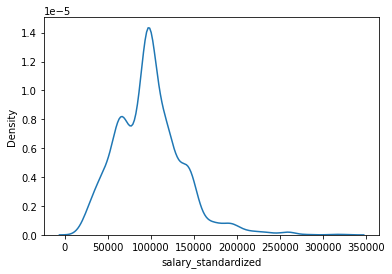

In [381]:
sns.kdeplot(data=clean_df, x="salary_standardized")

## Confidence Intervals

(80000.0, 105000.0)

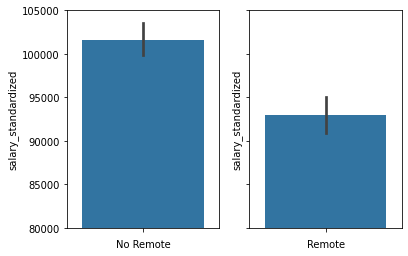

In [296]:
fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=clean_df_nomote, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
axes[0].set_xlabel("No Remote")
sns.barplot(data=clean_df_remote, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])
axes[1].set_xlabel("Remote")

plt.ylim(80_000, 105_000)



In [297]:
stats.ttest_ind(clean_df_nomote["salary_standardized"], clean_df_remote["salary_standardized"])

Ttest_indResult(statistic=5.739011899802912, pvalue=1.0837927012173897e-08)

## Distributions

Let's view the distributions of 3 tech-requested positions: `sql`, `python`, `tableau`

In [384]:
df_sql = clean_df[clean_df["sql"] == 1]
df_python = clean_df[clean_df["python"] == 1]
df_tab = clean_df[clean_df["tableau"] == 1]

# for fun
df_exc = clean_df[clean_df["excel"] == 1]

print("sql")
print(df_sql.shape)
print("python")
print(df_python.shape)
print("tableau")
print(df_tab.shape)
print("excel")
print(df_exc.shape)

sql
(1135, 137)
python
(448, 137)
tableau
(731, 137)
excel
(724, 137)


<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

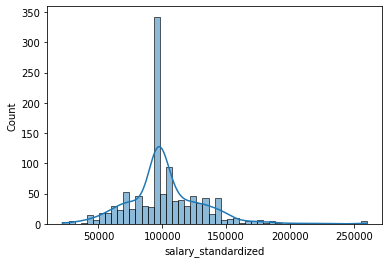

In [385]:
sns.histplot(df_sql["salary_standardized"], kde=True)

<AxesSubplot:ylabel='salary_standardized'>

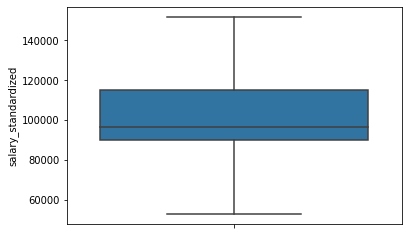

In [386]:
sns.boxplot(data=df_sql, y="salary_standardized", showfliers=False)

In [390]:
stats.kstest(df_sql["salary_standardized"], stats.norm.cdf, args=(df_sql["salary_standardized"].mean(), df_sql["salary_standardized"].std()))

KstestResult(statistic=0.14859694970660242, pvalue=2.428624055011539e-22)

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

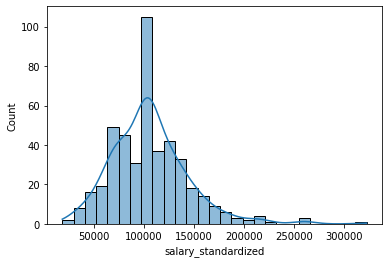

In [393]:
sns.histplot(df_python["salary_standardized"], kde=True)

<AxesSubplot:ylabel='salary_standardized'>

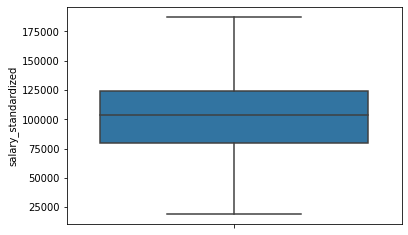

In [391]:
sns.boxplot(data=df_python, y="salary_standardized", showfliers=False)

In [392]:
stats.kstest(df_python["salary_standardized"], stats.norm.cdf, args=(df_python["salary_standardized"].mean(), df_python["salary_standardized"].std()))

KstestResult(statistic=0.10816134598371768, pvalue=5.1004787412886686e-05)

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

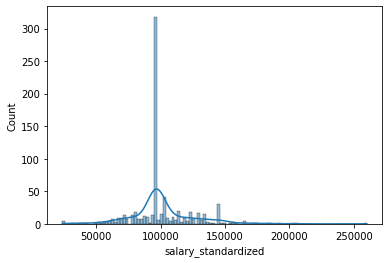

In [400]:
sns.histplot(df_tab["salary_standardized"], kde=True)

In [399]:
stats.kstest(df_tab["salary_standardized"], stats.norm.cdf, args=(df_tab["salary_standardized"].mean(), df_tab["salary_standardized"].std()))

KstestResult(statistic=0.22652993258106247, pvalue=1.9059409500066205e-33)

<AxesSubplot:xlabel='salary_standardized', ylabel='Count'>

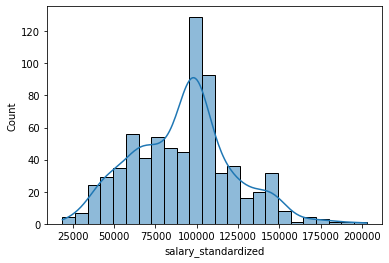

In [238]:
sns.histplot(df_exc["salary_standardized"], kde=True)

In [239]:
stats.kstest(df_exc["salary_standardized"], stats.norm.cdf, args=(df_exc["salary_standardized"].mean(), df_exc["salary_standardized"].std()))

KstestResult(statistic=0.08708313775217125, pvalue=3.413661788988768e-05)

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

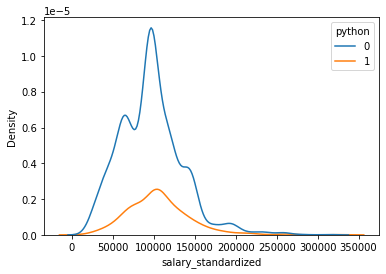

In [394]:
# density of python & non-python jobs

sns.kdeplot(data=clean_df, x="salary_standardized", hue="python")

<AxesSubplot:xlabel='python', ylabel='salary_standardized'>

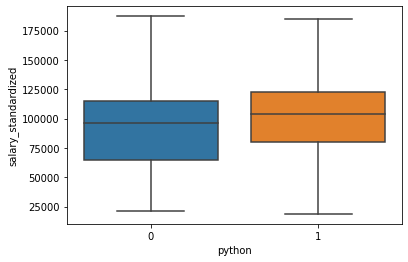

In [241]:
# does knowing python increase median salary?
sns.boxplot(data=clean_df, y="salary_standardized", x="python", showfliers=False)

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

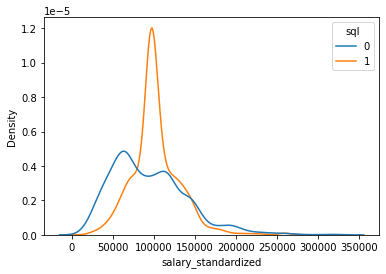

In [388]:
# density of sql & non-sql jobs

sns.kdeplot(data=clean_df, x="salary_standardized", hue="sql")

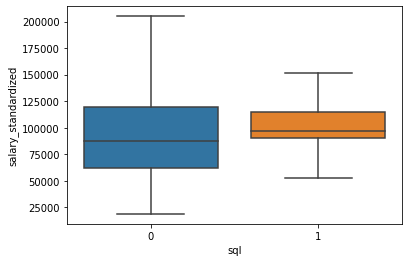

In [387]:
sns.boxplot(data=clean_df, y="salary_standardized", x="sql", showfliers=False)
plt.savefig("sql_boxes.jpg")

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

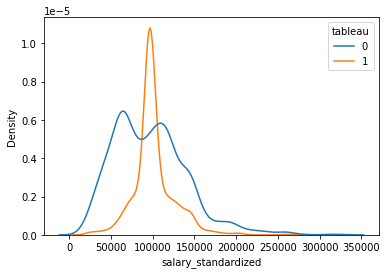

In [401]:
# density of tableau & non-tableau jobs
sns.kdeplot(data=clean_df, x="salary_standardized", hue="tableau")

<AxesSubplot:xlabel='tableau', ylabel='salary_standardized'>

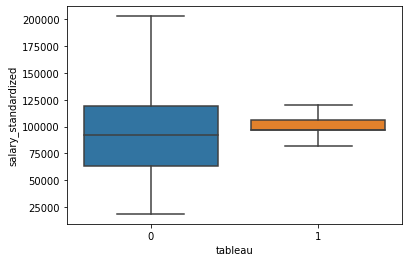

In [245]:
sns.boxplot(data=clean_df, y="salary_standardized", x="tableau", showfliers=False)

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

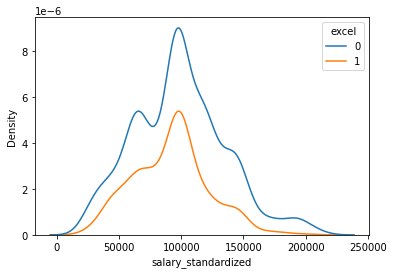

In [246]:
# density of excel & non-excel jobs

sns.kdeplot(data=clean_df, x="salary_standardized", hue="excel")

<AxesSubplot:xlabel='excel', ylabel='salary_standardized'>

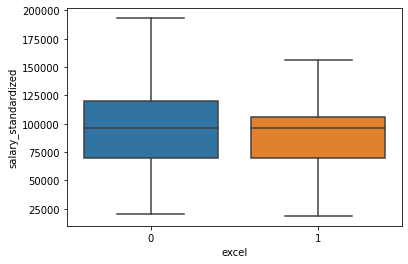

In [247]:
sns.boxplot(data=clean_df, y="salary_standardized", x="excel", showfliers=False)

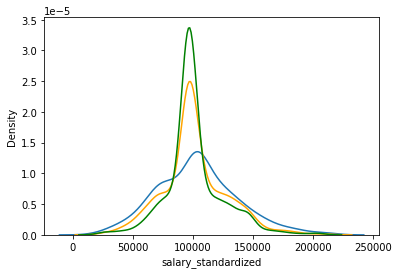

In [248]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# density of all 3 job-types

sns.kdeplot(data=df_python, x="salary_standardized")
sns.kdeplot(data=df_sql, x="salary_standardized", color='orange')
sns.kdeplot(data=df_tab, x="salary_standardized", color='green')

#sns.kdeplot(data=df_exc, x="salary_standardized", color='green')

plt.show()

In [249]:
# combination of skills

sql_py = clean_df[(clean_df["sql"] == 1) & (clean_df["python"] == 1)]
sql_nopy = clean_df[(clean_df["sql"] == 1) & (clean_df["python"] == 0)]

sql_tab = clean_df[(clean_df["sql"] == 1) & (clean_df["tableau"] == 1)]
sql_notab = clean_df[(clean_df["sql"] == 1) & (clean_df["tableau"] == 0)]

nosql_nopy = clean_df[(clean_df["sql"] == 0) & (clean_df["python"] == 0)]

nosql_notab = clean_df[(clean_df["sql"] == 0) & (clean_df["tableau"] == 0)]

print("sql python")
print(sql_py.shape)
print("sql no python")
print(sql_nopy.shape)

print("no sql no py")
print(nosql_nopy.shape)


sql python
(353, 137)
sql no python
(775, 137)
no sql no py
(987, 137)


<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

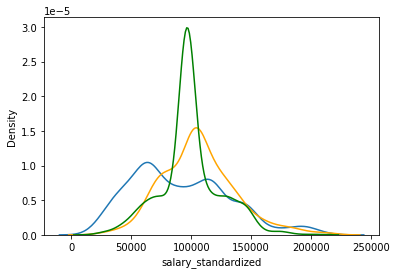

In [250]:
fig, ax = plt.subplots()

sns.kdeplot(data=nosql_nopy, x="salary_standardized")
sns.kdeplot(data=sql_py, x="salary_standardized", color='orange')
sns.kdeplot(data=sql_nopy, x="salary_standardized", color='green')

Text(0.5, 0, 'SQL+~Python')

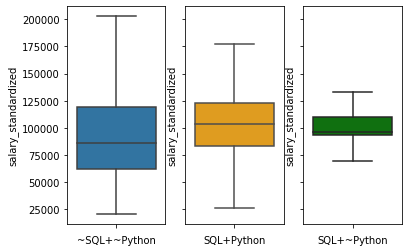

In [251]:
fig, axes = plt.subplots(1, 3, sharey=True)

sns.boxplot(data=nosql_nopy, y="salary_standardized", orient='v', ax=axes[0], showfliers=False)
axes[0].set_xlabel("~SQL+~Python")

sns.boxplot(data=sql_py, y="salary_standardized", color='orange', ax=axes[1], showfliers=False)
axes[1].set_xlabel("SQL+Python")

sns.boxplot(data=sql_nopy, y="salary_standardized", color='green', ax=axes[2], showfliers=False)
axes[2].set_xlabel("SQL+~Python")

## Confidence Intervals

Analyze confidence intervals of knowing different languages

<AxesSubplot:ylabel='salary_standardized'>

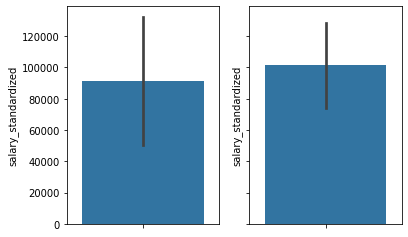

In [264]:
df_nosql = clean_df[clean_df["sql"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_nosql, y="salary_standardized", estimator='mean', errorbar='sd',  ax=axes[0])
sns.barplot(data=df_sql, y="salary_standardized", estimator='mean', errorbar='sd',  ax=axes[1])

plt.ylim(80_000, 105_000)

Text(0.5, 0, '~Remote')

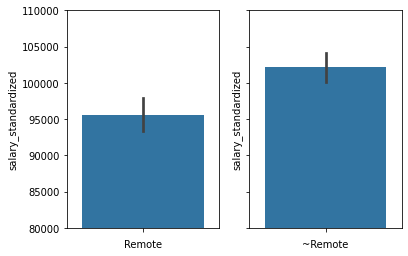

In [374]:
fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=clean_df_remote, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=clean_df_nomote, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 110_000)

axes[0].set_xlabel("Remote")
axes[1].set_xlabel("~Remote")

In [372]:
stats.ttest_ind(clean_df_remote["salary_standardized"], clean_df_nomote["salary_standardized"])

Ttest_indResult(statistic=-3.9625310257616233, pvalue=7.649327941393824e-05)

Text(0.5, 0, 'SQL')

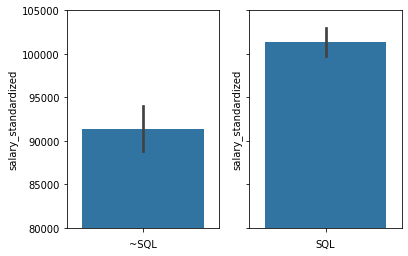

In [377]:
fig, axes = plt.subplots(1, 2, sharey=True)

sns.barplot(data=df_nosql, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_sql, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 105_000)

axes[0].set_xlabel("~SQL")
axes[1].set_xlabel("SQL")

In [389]:
stats.ttest_ind(df_nosql["salary_standardized"], df_sql["salary_standardized"])

Ttest_indResult(statistic=-7.200932462946706, pvalue=8.163860422881086e-13)

Text(0.5, 0, 'Python')

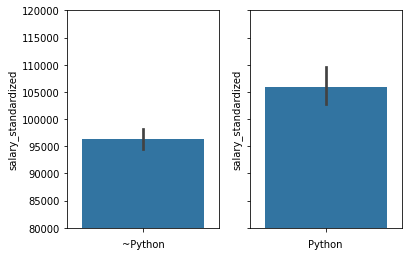

In [397]:
df_nopython = clean_df[clean_df["python"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_nopython, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_python, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 120_000)

axes[0].set_xlabel("~Python")
axes[1].set_xlabel("Python")

In [398]:
stats.ttest_ind(df_nopython["salary_standardized"], df_python["salary_standardized"])

Ttest_indResult(statistic=-4.764643115726993, pvalue=2.013804061910089e-06)

Text(0.5, 0, 'Tableau')

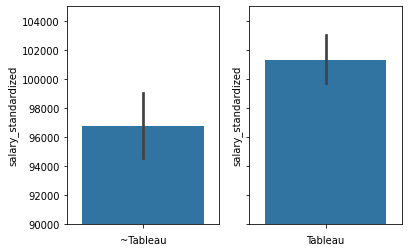

In [404]:
df_notab = clean_df[clean_df["tableau"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_notab, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_tab, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(90_000, 105_000)

axes[0].set_xlabel("~Tableau")
axes[1].set_xlabel("Tableau")

In [405]:
stats.ttest_ind(df_notab["salary_standardized"], df_tab["salary_standardized"])

Ttest_indResult(statistic=-2.6199543704935193, pvalue=0.008853883572145777)

(80000.0, 105000.0)

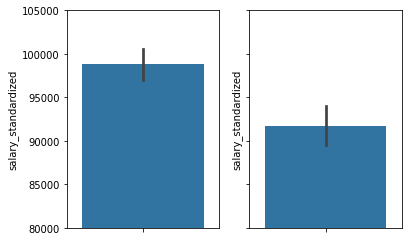

In [274]:
df_excel = clean_df[clean_df["excel"] == 1]
df_noexcel = clean_df[clean_df["excel"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_noexcel, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_excel, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 105_000)

In [275]:
stats.ttest_ind(df_noexcel["salary_standardized"], df_excel["salary_standardized"])

Ttest_indResult(statistic=4.505964011137038, pvalue=6.9532755569689174e-06)

(80000.0, 110000.0)

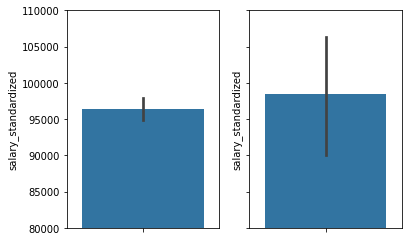

In [276]:
df_vba = clean_df[clean_df["vba"] == 1]
df_novba = clean_df[clean_df["vba"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_novba, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_vba, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 110_000)

In [277]:
stats.ttest_ind(df_novba["salary_standardized"], df_vba["salary_standardized"])

Ttest_indResult(statistic=-0.36246451642353267, pvalue=0.7170397350089579)

(80000.0, 115000.0)

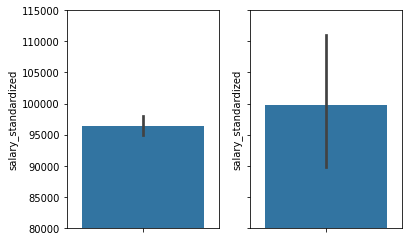

In [280]:
df_pandas = clean_df[clean_df["pandas"] == 1]
df_nopandas = clean_df[clean_df["pandas"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_nopandas, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=df_pandas, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

plt.ylim(80_000, 115_000)

In [281]:
stats.ttest_ind(df_nopandas["salary_standardized"], df_pandas["salary_standardized"])

Ttest_indResult(statistic=-0.5160913996900983, pvalue=0.6058424152477248)

(80000.0, 130000.0)

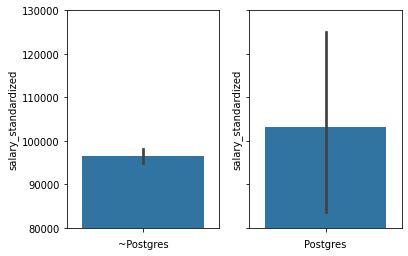

In [286]:
df_postgres = clean_df[clean_df["postgresql"] == 1]
df_nopostgres = clean_df[clean_df["postgresql"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_nopostgres, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
axes[0].set_xlabel("~Postgres")
sns.barplot(data=df_postgres, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])
axes[1].set_xlabel("Postgres")

plt.ylim(80_000, 130_000)

In [287]:
stats.ttest_ind(df_nopostgres["salary_standardized"], df_postgres["salary_standardized"])

Ttest_indResult(statistic=-0.5977564223191839, pvalue=0.5500639668482823)

(70000.0, 105000.0)

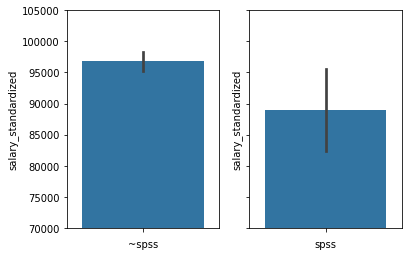

In [290]:
df_spss = clean_df[clean_df["spss"] == 1]
df_nospss = clean_df[clean_df["spss"] == 0]

fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_nospss, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
axes[0].set_xlabel("~spss")
sns.barplot(data=df_spss, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])
axes[1].set_xlabel("spss")

plt.ylim(70_000, 105_000)

In [291]:
stats.ttest_ind(df_nospss["salary_standardized"], df_spss["salary_standardized"])

Ttest_indResult(statistic=1.9889071183601725, pvalue=0.04683507683509192)

<AxesSubplot:xlabel='salary_standardized', ylabel='Density'>

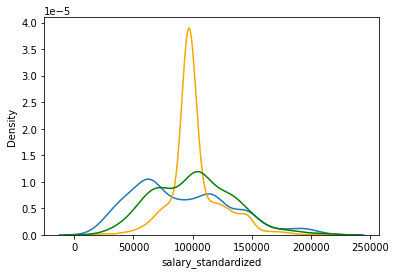

In [185]:
fig, ax = plt.subplots()

sns.kdeplot(data=nosql_notab, x="salary_standardized")
sns.kdeplot(data=sql_tab, x="salary_standardized", color='orange')
sns.kdeplot(data=sql_notab, x="salary_standardized", color='green')

## Bar Plots

Bar-plot of top-requested skills

<AxesSubplot:>

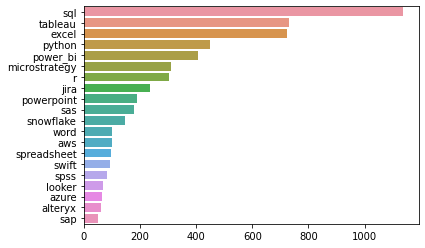

In [13]:
import seaborn as sns

top_skills = clean_df.iloc[:, 20:].sum().sort_values(ascending=False)

# selected = top_skills.iloc[0:20, ]
selected = top_skills.head(20)
sns.barplot(y=selected.index, x=selected.values, orient='h')

Bar-plot of top-hiring companies

<AxesSubplot:>

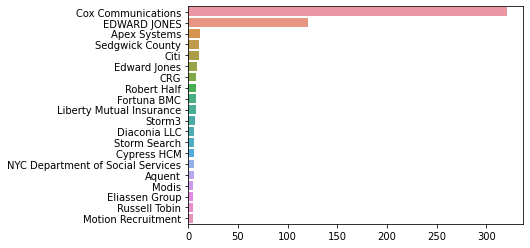

In [30]:
# remove staffing & external contract websites
ignore_comps = ["Upwork", "Corporate", "Talentify.io", "Dice", "Staffigo Technical Services, LLC", "Insight Global", "Harnham", "WayUp", "Jobot", 
                 "Addison Group", "Applicantz", "Analytic Recruiting Inc.", "Confidential"]

only_companies = clean_df[~(clean_df["company_name"].isin(ignore_comps))]

top_companies = only_companies["company_name"].value_counts().sort_values(ascending=False)

selected = top_companies.iloc[0:20, ]
sns.barplot(y=selected.index, x=selected.values, orient='h')

<AxesSubplot:xlabel='company_name', ylabel='salary_standardized'>

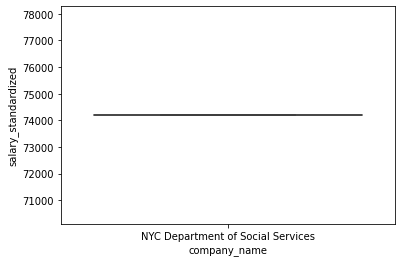

In [31]:

# create a boolean index to select rows that are from "NYC Department of Social Services"
# WHICH COLUMN AM I FILTERING ON? 
# WHAT EQUALITY/INEQUALITY DO I NEED? 
# WHAT VALUE AM I FOCUSING ON?
df_nyc = clean_df[clean_df["company_name"] == "NYC Department of Social Services"]
sns.boxplot(df_nyc, y="salary_standardized", x="company_name")

<AxesSubplot:xlabel='company_name', ylabel='salary_standardized'>

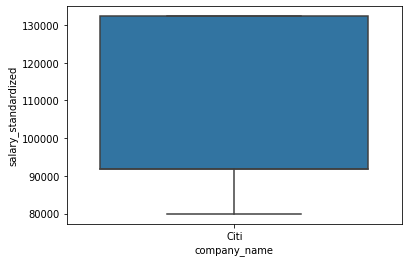

In [32]:
df_citi = clean_df[clean_df["company_name"] == "Citi"]
sns.boxplot(df_citi, y="salary_standardized", x="company_name")

<AxesSubplot:xlabel='company_name', ylabel='salary_standardized'>

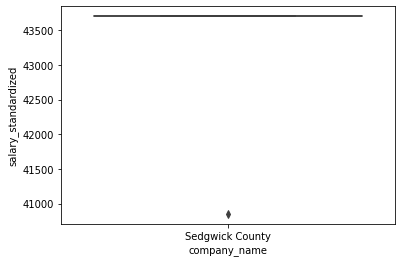

In [33]:
df_sed = clean_df[clean_df["company_name"] == "Sedgwick County"]
sns.boxplot(df_sed, y="salary_standardized", x="company_name")

distributions of companies

<AxesSubplot:xlabel='company_name', ylabel='salary_standardized'>

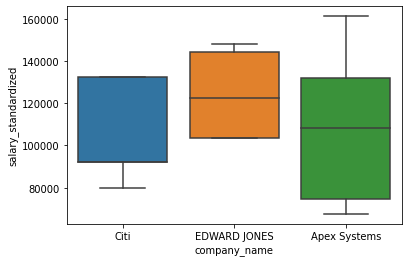

In [334]:
select_comps = ["Apex Systems", "Citi", "EDWARD JONES"]
select_df = clean_df[clean_df["company_name"].isin(select_comps)]

sns.boxplot(data=select_df, y="salary_standardized", x="company_name", showfliers=False)

(50000.0, 150000.0)

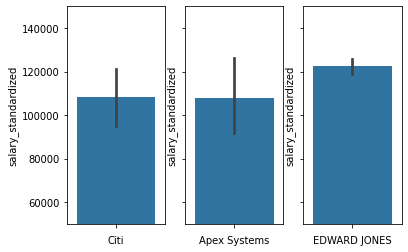

In [409]:
df_citi = clean_df[clean_df["company_name"] == "Citi"]
df_ed = clean_df[clean_df["company_name"] == "Apex Systems"]
df_apex = clean_df[clean_df["company_name"] == "EDWARD JONES"]

fig, axes = plt.subplots(1, 3, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_citi, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
axes[0].set_xlabel("Citi")
sns.barplot(data=df_ed, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])
axes[1].set_xlabel("Apex Systems")
sns.barplot(data=df_apex, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[2])
axes[2].set_xlabel("EDWARD JONES")

plt.ylim(50_000, 150_000)

## Location

<AxesSubplot:>

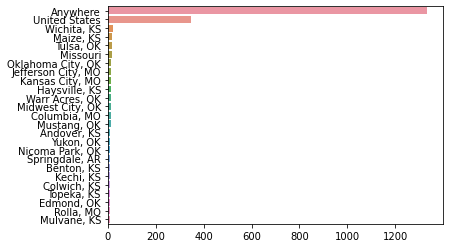

In [407]:
top_cities = clean_df.location.value_counts().sort_values(ascending=False)

selected = top_cities.iloc[0:25, ]
sns.barplot(y=selected.index, x=selected.values, orient='h')

<AxesSubplot:xlabel='location', ylabel='salary_standardized'>

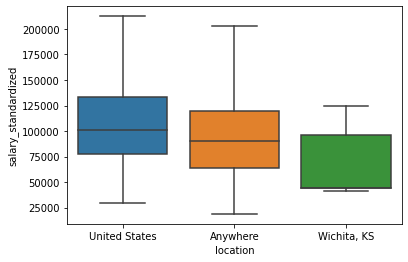

In [340]:
select_cities = ["Anywhere", "United States", "Wichita, KS"]
select_df = clean_df[clean_df["location"].isin(select_cities)]

sns.boxplot(data=select_df, y="salary_standardized", x="location", showfliers=False)

(50000.0, 120000.0)

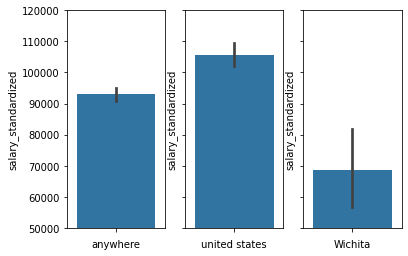

In [345]:
df_any = clean_df[clean_df["location"] == "Anywhere"]
df_us = clean_df[clean_df["location"] == "United States"]
df_wich = clean_df[clean_df["location"] == "Wichita, KS"]

fig, axes = plt.subplots(1, 3, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=df_any, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
axes[0].set_xlabel("anywhere")
sns.barplot(data=df_us, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[1])
axes[1].set_xlabel("united states")
sns.barplot(data=df_wich, y="salary_standardized", estimator='mean', errorbar=('ci', 95),  ax=axes[2])
axes[2].set_xlabel("Wichita")

plt.ylim(50_000, 120_000)